Financial Theory with Python - Chapter 4

In [1]:
from scipy.optimize import minimize
import numpy as np
import math
import sympy as sy
from pylab import mpl, plt
import warnings

In [2]:
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

In [3]:
np.set_printoptions(precision=5)

In [4]:
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

In [5]:
#  The utility function with a negative sign to accomplish a maximization through minimization.
def u(c):
    return -c[0] * c[1]

In [6]:
w = 10

In [7]:
# The budget constraint as an equality constraint for the minimize function.

cons = ({'type': 'eq', 'fun': lambda c: c[0] + c[1] - w})

In [8]:
# The optimization with initial guess and budget constraint.

opt = minimize(u, (1, 1), constraints=cons)

In [9]:
opt

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -24.999999999999996
       x: [ 5.000e+00  5.000e+00]
     nit: 2
     jac: [-5.000e+00 -5.000e+00]
    nfev: 6
    njev: 2

In [10]:
# The optimal consumption-saving plan

opt['x']

array([5., 5.])

In [11]:
# The maximum utility gained through the optimal plan

-opt['fun']

24.999999999999996

# Indifference Curves

In [12]:
def iu(u, c0):
    return u / c0

In [13]:
def c1(c0): 
    return w - c0

In [14]:
c0 = np.linspace(1, w)

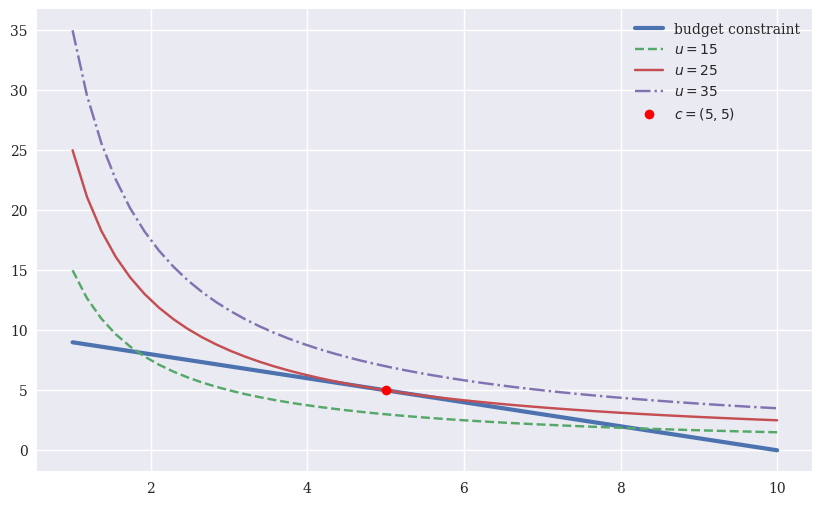

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(c0, c1(c0), label='budget constraint', lw=3.0)
plt.plot(c0, iu(15, c0), '--', label='$u=15$')
plt.plot(c0, iu(25, c0), label='$u=25$')
plt.plot(c0, iu(35, c0), '-.', label='$u=35$')
plt.plot(opt['x'][0], opt['x'][1], 'ro', label='$c=(5, 5)$')
plt.legend(loc=0);

# Logarithmic Utility

In [16]:
# Creates an ndarray object with floating point numbers between 0.5 and 10 and a homogeneous spacing to get 50 values.

x = np.linspace(0.5, 10, 50)

In [17]:
# Calculates the values for the utility function.

u = np.log(x)

In [18]:
# And for its first derivative

u1 = 1 / x

In [19]:
# Second derivative

u2 = -1 / x ** 2

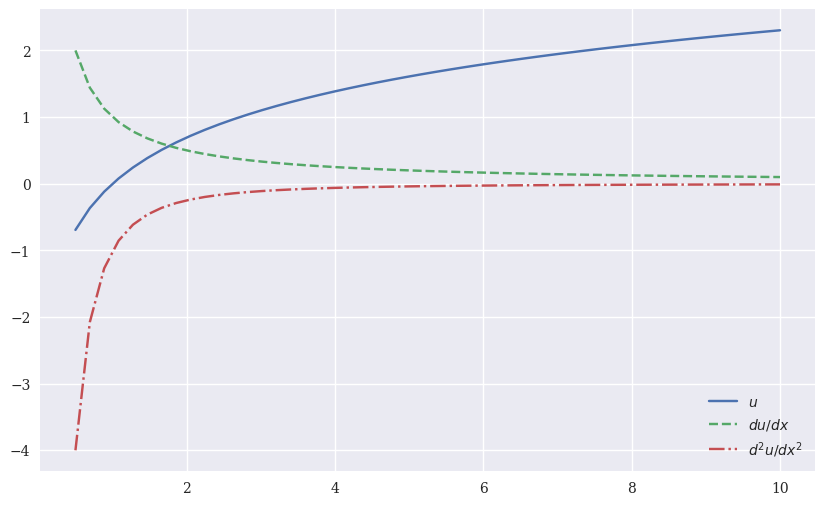

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(x, u, label='$u$')
plt.plot(x, u1, '--', label='$du/dx$')
plt.plot(x, u2, '-.', label='$d^2u/dx^2$')
plt.legend(loc=0);

# Time-Additive Utility

In [21]:
kappa = 10/11
w = 10

In [22]:
def U(c):
    return - (math.log(c[0]) + kappa*math.log(c[1]))

In [23]:
cons = ({'type': 'eq', 'fun': lambda c:c[0] + c[1] - w})

In [24]:
opt = minimize (U, (1,1), constraints=cons)

In [25]:
opt

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -3.0747286083026886
       x: [ 5.238e+00  4.762e+00]
     nit: 6
     jac: [-1.909e-01 -1.909e-01]
    nfev: 18
    njev: 6

In [26]:
opt ['x']

array([5.23811, 4.76189])

In [27]:
-opt['fun']

3.0747286083026886

# Optimal Investment Portfolio

In [28]:
# The bond price process
B = (10, (11, 11)) 

# The stock price process
S = (10, (20, 5))

In [29]:
# The price vector of the two traded financial assets
M0 = np.array((B[0], S[0])) 

# The market payoff matrix of the two traded financial assets
M = np.array((B[1], S[1])).T

In [30]:
# The physical probability measure for the economy

p = 0.5
P = np.array((p, 1-p))

In [31]:
# The expected utility function with logarithmic utility

def U(phi):
    c1 = np.dot(M, phi)
    return -np.dot(P, np.log(c1))

In [32]:
# Some example values for total portfolio weights of 1—diversification pays off

-U((1, 0))

2.3978952727983707

In [33]:
-U((0, 1))

2.3025850929940455

In [34]:
-U((0.5, 0.5))

2.410140782802518

In [35]:
w = 10

In [36]:
# The budget constraint based on the dot product of the price and portfolio vectors

cons = ({'type': 'eq', 'fun': lambda phi: np.dot(M0, phi) - w})

In [37]:
# The expected utility maximization problem as a minimization

opt = minimize(U, (1, 1), constraints=cons)

In [38]:
opt

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -2.4183062699261972
       x: [ 6.944e-01  3.056e-01]
     nit: 5
     jac: [-1.000e+00 -1.000e+00]
    nfev: 15
    njev: 5

In [39]:
# The optimal allocation between the bond and the stock

opt['x']

array([0.69442, 0.30558])

In [40]:
-opt['fun']

2.4183062699261972

In [41]:
# The optimal expected utility value

-U(opt['x'])

2.4183062699261972

In [42]:
# The state-contingent payoff from the optimal portfolio

np.dot(M, opt['x'])

array([13.75022,  9.16652])

# Time-Additive Expected Utility

In [43]:
# The price vector including the price of 1 for consumption today

M0 = np.array((1, B[0], S[0]))

In [44]:
# The time preference factor

kappa = 10 / 11

In [45]:
# The expected utility function taking into account consumption today and the time preference

def U(phi):
    c0 = phi[0]
    c1 = np.dot(M, phi[1:])
    return -(np.log(c0) + kappa * np.dot(P, np.log(c1)))

In [46]:
opt = minimize(U, (1, 1, 1), constraints=cons)

In [47]:
opt

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -3.1799295980286093
       x: [ 5.239e+00  3.309e-01  1.452e-01]
     nit: 8
     jac: [-1.909e-01 -1.909e+00 -1.910e+00]
    nfev: 32
    njev: 8

In [48]:
-opt['fun']

3.1799295980286093

In [49]:
# This is what the agent consumes today from

opt['x'][0]

5.23898714830318

In [50]:
# This is the state-contingent payoff from the bond and the stock position

np.dot(M, opt['x'][1:])

array([6.54422, 4.36571])

# Martingale Pricing

In [51]:
# The probability measure
p = 1 / 3
P = np.array((p,(1-p)))
B1 = np.array((11,11))
S1 = np.array((20,5))

In [52]:
# The price ratio zeta given optimality conditions
zeta = np.dot(S1/(B1+S1),P)/np.dot(B1/(B1+S1),P)
zeta

0.7342657342657343

In [53]:
# The initial wealth
w = 15

In [54]:
# The equilibrium price level of the risk-less bond given the price ratio zeta and initial wealth w

B0 = w / (1 + zeta)

In [55]:
B0

8.649193548387098

In [56]:
# The resulting equilibrium price level of the risky stock

S0 = zeta * B0

In [57]:
S0

6.350806451612904

In [58]:
# The budget constraint is binding

B0 + S0

15.000000000000002

In [59]:
# The equilibrium interest rate given the price level for the risk-less bond

i = B1.mean() / B0 - 1

In [60]:
i

0.2717948717948717

In [61]:
# The equilibrium expected rate of return of the risky stock

mu = np.dot(S1, P) / S0 - 1

In [62]:
mu

0.5746031746031743

# Martingale measure

In [63]:
# Defining the symbol q

q = sy.Symbol('q')

In [64]:
# Formulating the equation for q given the martingale condition

eq = (q * 20 + (1 - q) * 5) / (1 + i) - S0

In [65]:
# The equation simplified

eq

11.7943548387097*q - 2.41935483870968

In [66]:
# This solves the equation numerically

q = sy.solve(eq)[0]

In [67]:
# The resulting martingale measure

q

0.205128205128205

In [68]:
# The resulting martingale measure

Q = np.array((q, 1 - q))

In [69]:
# Both discounted price processes are martingales under Q

np.dot(B1, Q) / (1 + i)

8.64919354838710

In [70]:
# Both discounted price processes are martingales under Q

np.dot(S1, Q) / (1 + i)

6.35080645161290

# Pricing in Incomplete Markets

In [71]:
# The probability measure

p=1/3
P = np.array((p, p, p))

In [72]:
B1 = np.array((11, 11, 11))
S1 = np.array((20, 10, 5))

In [73]:
# The relative price zeta given optimality conditions

zeta = np.dot(S1 / (B1 + S1), P) / np.dot(B1 / (B1 + S1), P)
zeta

0.9155274934101636

In [74]:
# The initial wealth

w = 15

In [75]:
# The equilibrium price level of the risk-less bond given the price ratio zeta and initial wealth w

B0 = w / (1 + zeta)
B0

7.8307411674347165

In [76]:
# The resulting equilibrium price level of the risky stock

S0 = zeta * B0
S0

7.169258832565284

In [77]:
# The budget constraint is binding

B0 + S0

15.0

In [78]:
# The equilibrium interest rate given the price level for the risk-less bond

i = B1.mean() / B0 - 1
i

0.40472016183411985

In [79]:
# The equilibrium expected rate of return of the risky stock

mu = np.dot(S1, P) / S0 - 1
mu

0.6273183796451287

# Equilibrium Pricing

In [80]:
#  The probability measure

p = 1/3
P = np.array((p, p, p))

In [81]:
# The payoff vectors

B1 = np.array((11, 11, 11))
S1 = np.array((20, 10, 5))
C1 = np.array((5, 0, 0))

In [82]:
# The first relative price

zeta_1 = (np.dot(S1 / (B1 + S1 + C1), P) /np.dot(B1 / (B1 + S1 + C1), P))
zeta_1

0.8862001308044474

In [83]:
# The second relative price

zeta_2 = (np.dot(C1 / (B1 + S1 + C1), P) /np.dot(B1 / (B1 + S1 + C1), P))
zeta_2

0.09156311314584695

In [84]:
# The initial wealth

w = 15

In [85]:
# Resulting price for the risk-less bond

B0 = w / (1 + zeta_1 + zeta_2)
B0

7.584325396825396

In [86]:
# Equilibrium price for the risky stock

S0 = zeta_1 * B0
S0

6.721230158730158

In [87]:
# Equilibrium price for the contingent claim

C0 = zeta_2 * B0
C0

0.6944444444444443

In [88]:
# Budget constraint is binding

B0 + S0 + C0

14.999999999999998

In [89]:
# Risk-less interest rate

i = B1.mean() / B0 - 1
i

0.45035971223021587

In [90]:
# The equilibrium expected rate of return for the risky stock

muS = np.dot(S1, P) / S0 - 1
muS

0.7357933579335794

In [91]:
# The equilibrium expected rate of return for the contingent claim

muC = np.dot(C1, P) / C0 - 1
muC

1.4000000000000004

In [92]:
# The new market payoff matrix including the contingent claim

M = np.array((B1, S1, C1)).T
M

array([[11, 20,  5],
       [11, 10,  0],
       [11,  5,  0]])

In [93]:
# The vector with the prices of the three financial assets/contingent claims
M0 = np.array((B0, S0, C0))

In [94]:
# This solves for the vector Q representing the martingale measure (note the use of the transpose operator .T).

Q = np.linalg.solve(M.T / (1 + i), M0)
Q

array([0.20144, 0.34532, 0.45324])

In [95]:
# The solution vector whose components add up to 1
sum(Q)

1.0

In [96]:
# A final check whether all discounted price processes are indeed martingales

np.allclose(np.dot(M.T, Q), M0 * (1 + i))

True